<a href="https://colab.research.google.com/github/HaroldConley/diplomado_BD/blob/main/Evaluaciones/C3/Evaluacion_final_v10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Control 3
Nombre 1: _Puede incluir su nombre acá haciendo doble click_                                                                                                                                      <br> 
Nombre 2: _Puede incluir su nombre acá haciendo doble click_   

# Instrucciones

El siguiente test podrá desarrollarlo de manera individual o en pareja con otro(a) de sus compañeros(as).<br>

Lea atentamente cada una de las preguntas propuestas y sea claro en los comentarios (si es que los incluye) de los desarrollos de sus respuestas. Para el desarrollo de las mismas, dispone de celdas de código después de cada pregunta. Sin embargo podrá agregar más celdas si así lo estima conveniente.<br>
Las preguntas formuladas en este test pueden ser abordadas con las herramientas trabajadas en clases, sin embaro, usted podrá hacer uso de las funcionalidades y/o packages que estime convenientes, a menos que se indique explícitamente lo contrario.

## Tiempo y entrega
Dispondrán hasta el día domingo **21 de agosto** hasta las 23:59 hrs para hacer envío de sus respuestas.
Una vez finalizado el desarrollo del test, deberá entregarlo teniendo en cuenta las siguientes consideraciones :

 * Descargue el notebook en **formato `*.ipynb`** (uno por pareja), e indique en el nombre del archivo los nombres de los integrantes, `Control3_nombres_integrantes.ipynb`. 
 
 * En caso de trabajar en Rstudio, deberá enviar el script de extensión `*.R` con el siguiente nombre: `Control3_nombres_integrantes.R` , **procurando indicar con comentarios claros, qué pregunta está respondiendo en cada caso**.
 * Envíe el archivo al correo rumorale1@gmail.com, con copia a majorquev@gmail.com con el asunto "DBDC-R-C3: 'nombre y apellido de los integrantes' "
 
**NOTA**: 
   * Los correos cuyo asunto no comiencen con "DBDC-R-C3" no llegarán a destino y por ende no serán calificados.
   * Los archivos que no contengan nombre serán calificados con la nota mínima 1.0.
   * Los correos enviados posterior a la fecha y hora de entrega indicados tendrán una penalización de 1 punto por día (o fracción) de retraso en la entrega, por ejemplo, si usted envía sus respuestas a las 00:05 hrs del lunes 22 de agosto, su nota máxima será un 6.0.

# Sección 1
## Introducción
En esta seción usted generará un breve anáisis descriptivo de la evolución de la expectativa de vida de diferentes países. Para ello usted utilizará la información disponible en el dataset `gapminder` del package del mismo nombre. La información contenida en este dataset corresponde a la siguiente:
        
   * **country:** Factor con 142 niveles

   * **continent:** Factor con 5 niveles

   * **year:** Rangos de años desde 1952 to 2007 en incrementos de  5 años

   * **lifeExp:** Esperanza de vida al nacer, en años

   * **pop:** Población

   * **gdpPercap:** GDP per capita (US$, ajustado por inflación)

In [1]:
options(repr.plot.width=12, repr.plot.height=6)
install.packages("gapminder")
library(gapminder)
data(gapminder)
head(gapminder)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [2]:
library("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**P1) (2pts)** El siguiente representa la relación entre el el ingreso GDP y la esperanza de vida para **todos los países** a lo largo de **todos los años**, adicionalmente el tamaño de cada punto está en proporción con la poblción total de cada país. Adicionalmente, el color varía en función del año del registro.
En el gráfico se pueden apreciar observaciones con alto GDP (aquellas encerradas en el recuadro rojo). Identifíque dichas observaciones e indique claramente a qué país(es) y año(s) corresponden. 

NOTA: Usted tiene libertad de escoger el método con el cual identificar dichas observaciones.



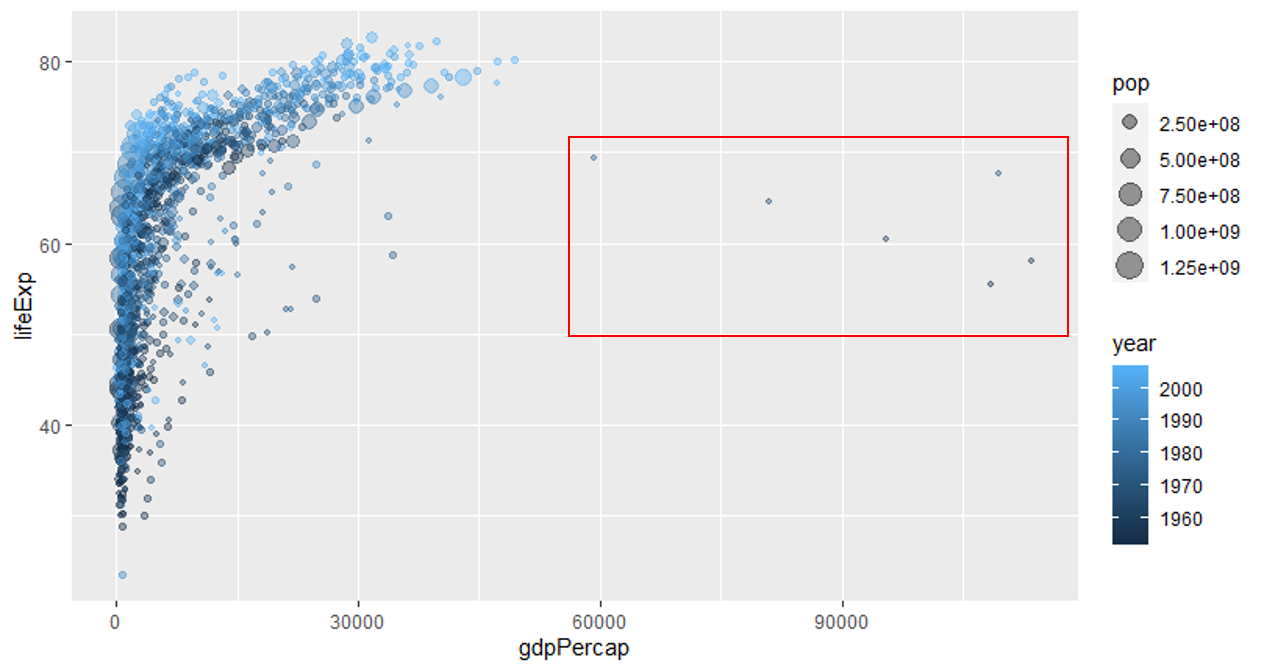

In [3]:
# Pregunta 1.- "...". Identifíque dichas observaciones e indique claramente a qué país(es) y año(s) corresponden.
gapminder %>%
  arrange(desc(gdpPercap)) %>%
  head(6)

# Respuesta: Todas las observaciones corresponden a Kuwait, los años 1957, 1972, 1952, 1962, 1967, 1977.-

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Kuwait,Asia,1957,58.033,212846,113523.13
Kuwait,Asia,1972,67.712,841934,109347.87
Kuwait,Asia,1952,55.565,160000,108382.35
Kuwait,Asia,1962,60.470,358266,95458.11
Kuwait,Asia,1967,64.624,575003,80894.88
Kuwait,Asia,1977,69.343,1140357,59265.48


**P2) (3pts)** Mediante un gráfico de puntos, visualice una comparativa entre la relación de ingresos y expectativa de vida, para los ños 1052 y 2007. Para ello usted deberá replicar el siguiente gráfico, donde el color representa a un continente distinto y el tamaño está dado por el total de población. 

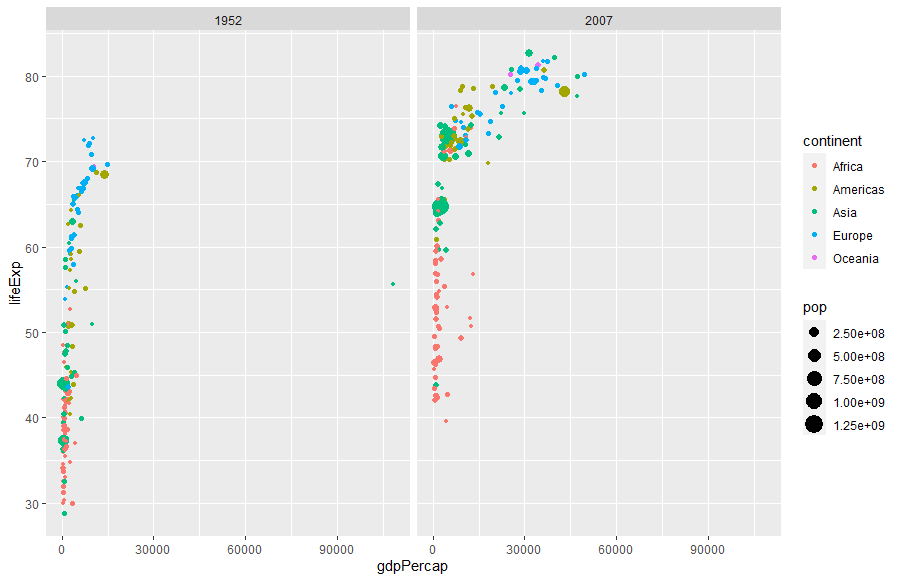

In [4]:
library("ggplot2")

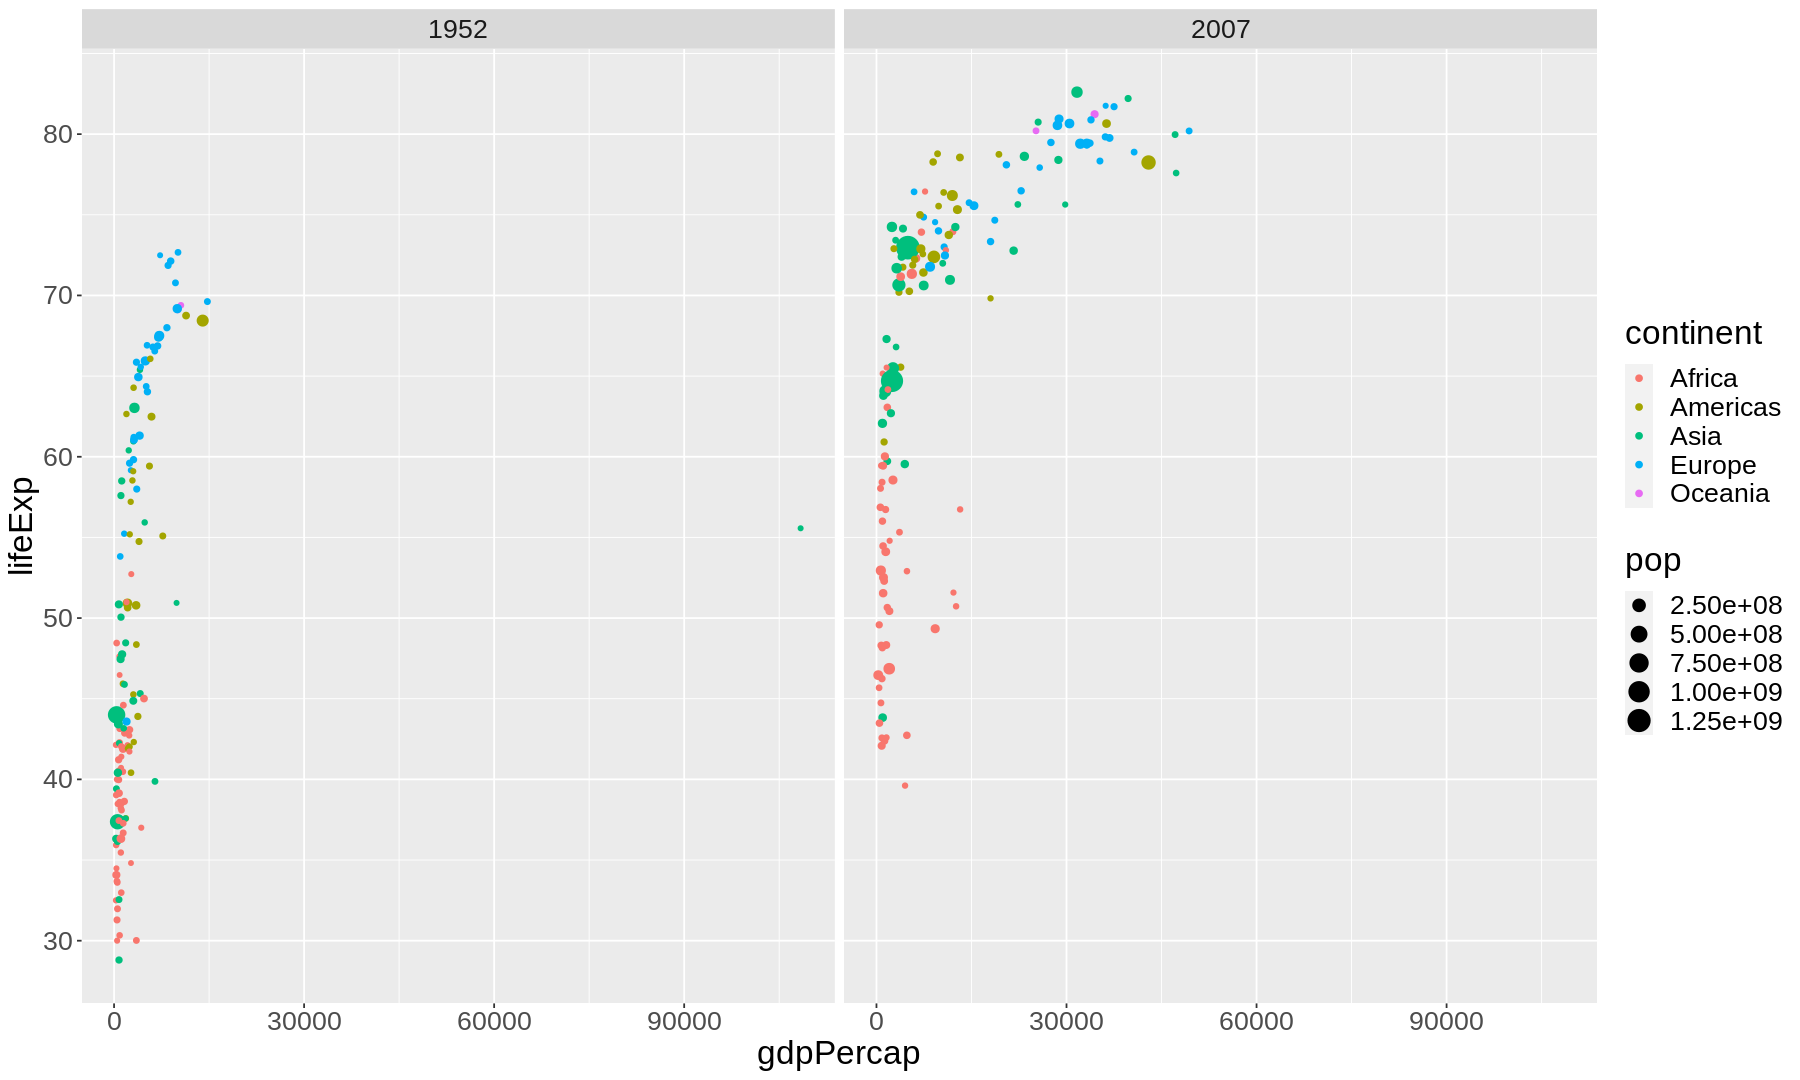

In [5]:
# Pregunta 2.- Mediante un gráfico de puntos, visualice una comparativa entre la relación de ingresos y expectativa de vida, para los años 1952 y 2007.
# Para ello usted deberá replicar el siguiente gráfico, donde el color representa a un continente distinto y el tamaño está dado por el total de población.

# Respuesta:
options(repr.plot.width=15, repr.plot.height=9) # Para cambiar el tamaño.

ggplot(gapminder %>% filter(year == 1952 | year == 2007)) +
aes(x = gdpPercap, y = lifeExp, color = continent, size = pop) + 
geom_point() + 
facet_wrap(~year) +
theme(text=element_text(size=20)) # Define tamaño de los textos en el gráfico.


**P3) (2pts)** Determine el nivel de correlación de **spearman**, entre las variables `gdpPercap` y `lifeExp` para cada uno de los años registrados. ¿En qué año se observa el mayor nivel de correlación entre ambas variables?

In [6]:
# Pregunta 3.-
 
max_spear <- 0
max_spear_year <- 0

for(k in c(1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007)){
  aux <- gapminder %>% filter(year == k)
  spear <- cor(aux$gdpPercap, aux$lifeExp, method = "spearman")
  ifelse(spear > max_spear, max_spear_year <- k, NA)
  ifelse(spear > max_spear, max_spear <- spear, NA)
  print(paste(k, ": ", spear))
}

max_spear
max_spear_year

# Respuesta: El año 1992 se observa el mayor nivel de correlación (0.897241248516547)

[1] "1952 :  0.768700583204629"
[1] "1957 :  0.782120786016501"
[1] "1962 :  0.796956351813812"
[1] "1967 :  0.794634427969979"
[1] "1972 :  0.806723094106972"
[1] "1977 :  0.827540754121515"
[1] "1982 :  0.86076853922224"
[1] "1987 :  0.892465378083247"
[1] "1992 :  0.897241248516547"
[1] "1997 :  0.895065078763011"
[1] "2002 :  0.865274072645964"
[1] "2007 :  0.856589918921354"


[1] 0.8972412

[1] 1992

**P4)** Para el año obtenido en la pregunta anterior, realice una breve descrición de la distribución de la expectativa de vida `lifeExp`. E indique lo siguiente

   **a) (1pt)** ¿Cuál fue la esperanza de vida promedio considerando todos los países registrados?<br>
   **b) (1pt)** ¿Cuál es el país que en dicho año tuvo la mayor esperanza de vida?<br>

 


In [7]:
# Pregunta 4.a.-
gapminder_92 <- gapminder %>% filter(year == 1992)
mean(gapminder_92$lifeExp, na.rm = T)
# Respuesta: 64.160338028169 años.

# Pregunta 4.b.-
gapminder_92[gapminder_92$lifeExp %>% which.max,]
# Respuesta: Japón.

[1] 64.16034

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Japan,Asia,1992,79.36,124329269,26824.9


## En busca de la normalidad

Se sabe que una manera de estabilizar la variabilidad presente en una variable, es estudiando su logaritmo. A continuación usted deberá estudiar el comportamiento ddistribucional del loagritmo de la expectativa de vida.


**P5)** Considerando todos los años de observación, determine lo sguiente:

  **a) (2pts)**  Mediante el test de shapiro, indique los dos continentes que presentan un comportamiento normal en la distribución del logaritmo de `lifeExp`. <br>
  **b) (3pts)** Para los continentes encontrados en **a)**, grafique los histogramas para el logaritmo de `lifeExp`. Considere añadir estimaciones de las densidades, dadas por geom_density así como una densidad normal con parámetros de media y vrianza igual a la media y desviación estandar muestral. ¿Qué opina sobre el histograma de Oceanía? Comente sobre posibles causas de su aspecto.<br>
  **c) (2pts)** Complemente lo anterior, visualizando los qqplots para el logarimo de `lifeExp`.  Considere la utilización de las funciones `qqnorm()` y `qqline()` para el contraste contra una distribución normal.

In [8]:
# Pregunta 5.a.- Mediante el test de shapiro, indique los dos continentes que presentan un comportamiento normal en la distribución del logaritmo de lifeExp.
gapminder_life_log <- gapminder %>%
                        mutate(log_lifeExp = log(lifeExp))

for(k in c("Africa", "Americas", "Asia", "Europe", "Oceania")){
  aux <- gapminder_life_log %>% filter(continent == k)
  shap_life_log <- shapiro.test(aux$log_lifeExp)
  print(k)
  print(shap_life_log)
}
# Respuesta: Africa y Oceanía.


[1] "Africa"

	Shapiro-Wilk normality test

data:  aux$log_lifeExp
W = 0.99603, p-value = 0.1171

[1] "Americas"

	Shapiro-Wilk normality test

data:  aux$log_lifeExp
W = 0.90933, p-value = 1.819e-12

[1] "Asia"

	Shapiro-Wilk normality test

data:  aux$log_lifeExp
W = 0.94009, p-value = 1.517e-11

[1] "Europe"

	Shapiro-Wilk normality test

data:  aux$log_lifeExp
W = 0.88193, p-value = 5.283e-16

[1] "Oceania"

	Shapiro-Wilk normality test

data:  aux$log_lifeExp
W = 0.92871, p-value = 0.09124



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



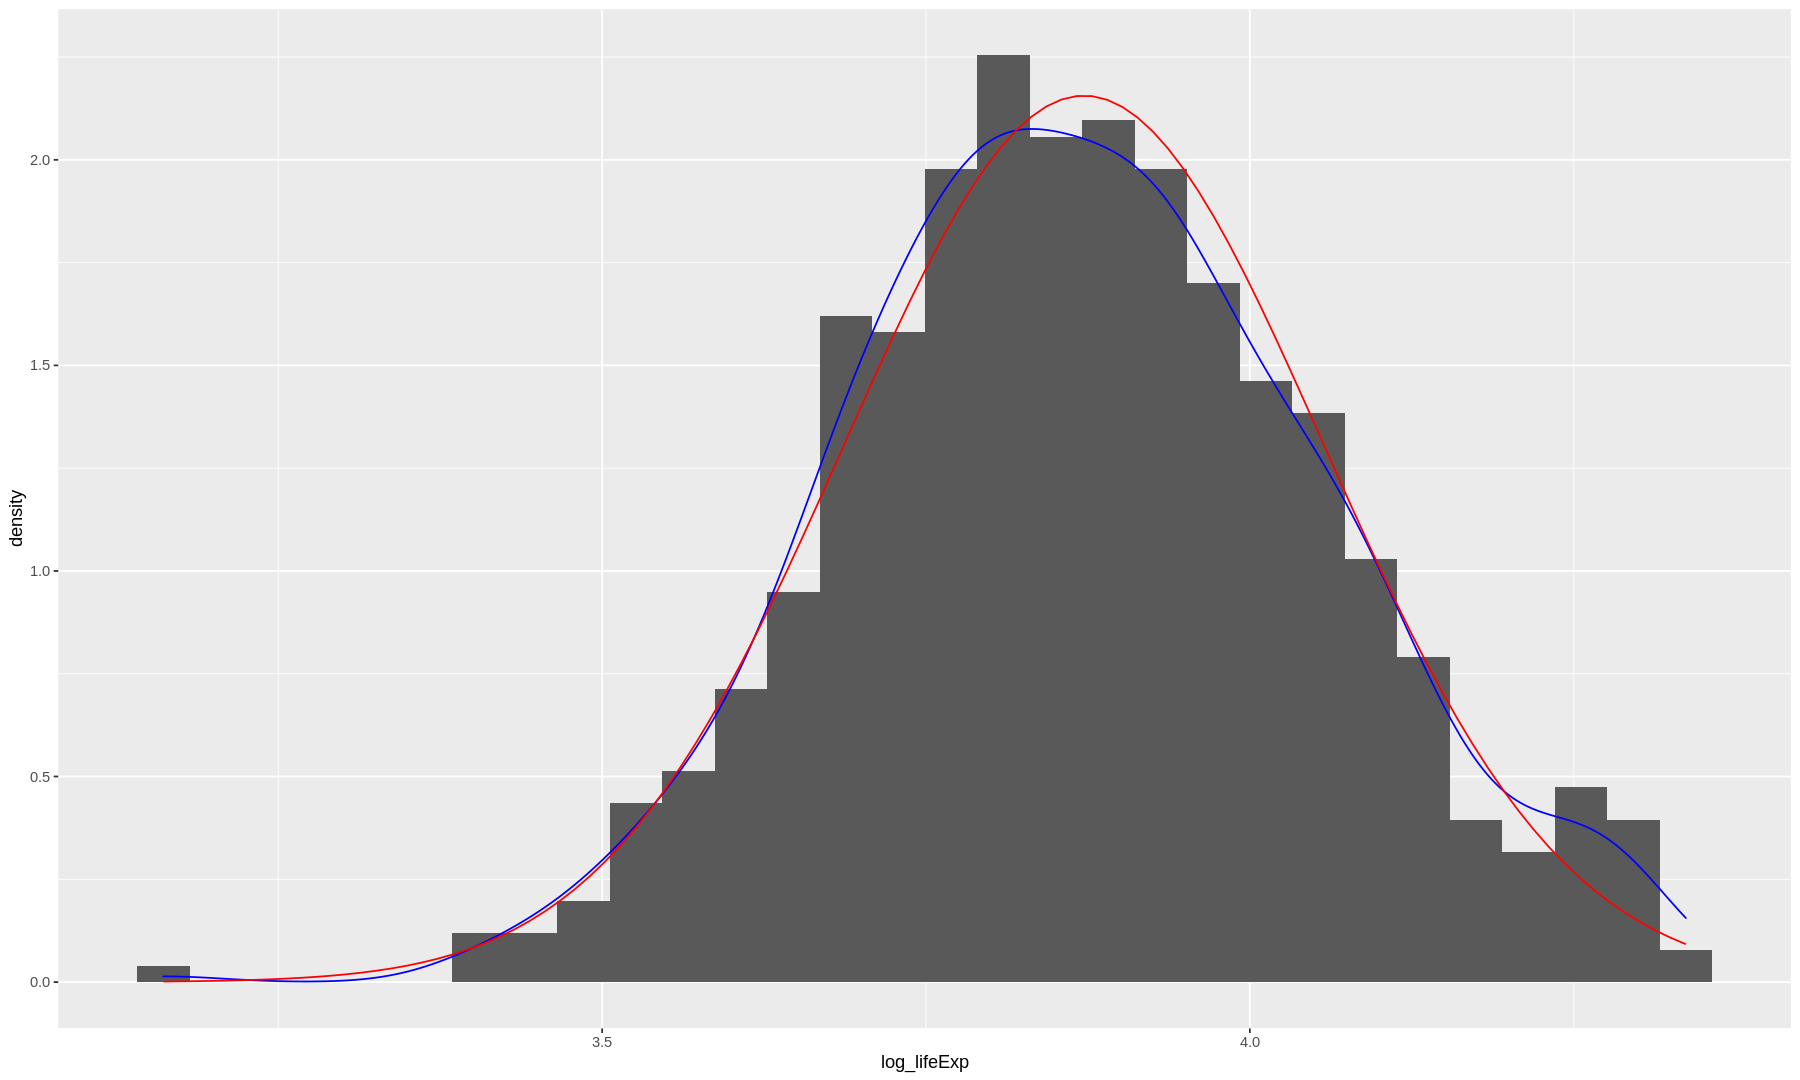

In [29]:
# Pregunta 5.b.- Para los continentes encontrados en a), grafique los histogramas para el logaritmo de lifeExp. 
# Considere añadir estimaciones de las densidades, dadas por geom_density así como una densidad normal con parámetros de media y varianza igual
# a la media y desviación estandar muestral. ¿Qué opina sobre el histograma de Oceanía? Comente sobre posibles causas de su aspecto.
gapminder_africa_life_log <- gapminder_life_log %>% filter(continent == "Africa")

ggplot(gapminder_africa_life_log) +
  aes(x = log_lifeExp) +
  geom_histogram(aes(y = ..density..))+
  geom_density(col = "blue") +
  stat_function(fun = function(x){
    dnorm(x, mean = mean(gapminder_africa_life_log$log_lifeExp), sd = sd(gapminder_africa_life_log$log_lifeExp))
  }, col = "red")

In [25]:
m <- mean(gapminder_africa_life_log$log_lifeExp)
std <- sd(gapminder_africa_life_log$log_lifeExp)

curve(dnorm(x, mean=m, sd=std), 
      col="red", lwd=2, add=TRUE, yaxt="n")

ERROR: ignored

In [ ]:

ggplot(gapminder_life_log %>% filter(continent == "Oceania")) +
  aes(x = log_lifeExp) +
  geom_histogram(bins = 5) +
  geom_density()

**P6) (3pts)** Considerando el continente de África, y asumiendo normalidad en el logaritmo de lifeExp. Independiente del año, ¿cuál es la probabilidad de que la **expectativa de vida** (`lifeExp`) sea superior a 54 años?



In [ ]:
# P6 --------------------------------------------------
# Respuesta# 


# Sección 2
## Cafetería
A usted se le solicita analizar las ventas de los distintos productos ofrecidos por una cafetería. Para ello usted deberá generar una descripción de dichas ventas,utilizando estadísticos descriptivos, gráficos  y además deberá incluir un análisis de la venta cruzada de los productos en cuestión. 

In [ ]:
library(arules)
library(dplyr)
library(ggplot2)

In [ ]:
library(tidyverse)

El siguiente archivo ("cafeteria.csv") contiene los registros de las ventas de una cafetería en un determinado período.
Ustede deberá responder las siguientes preguntas con el objetivo de generar recomendaciones de ventas en distintos períodos de tiempo.

In [ ]:
# Cargue aquí el archivo "cafeteria.csv" 

**P1) (2pts)** Genere tres nuevas columnas, que contengan la hora, minutos  y segundos de la transacción registrada.
A modo de referencia, su tabla debería contener al menos los siguientes campos (en la imagen se muestran sólo algunos registros de la tabla).

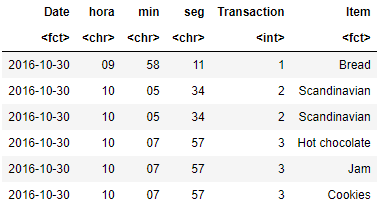

De ser de utilidad, puede consultar la documentación de las funciones substr y separate de los packages base y tidyr respectivamente.

In [ ]:
# P1 --------------------------------------------------
# Respuesta


**P2) (4pts)**  Genere una tabla resumen que contenga la siguiente información.

* `hora`: Hora donde se registraron las transacciones. por ejemplo, el valor 09 indica el bloque horario comprendido entre las 09:00 y 09:59 hrs. 
* `total_trx` : total de transacciones distintas generadas en el bloque horario respectivo.
* `total_items`: total de items vendidos en el bloque horario respectivo.
* `total_items_unicos`: total de items únicos venidos en el bloque horario respectivo.


In [ ]:
# P2 --------------------------------------------------
# Respuesta


**P3)** Con base en la tabla anterior, diremos que una hora pertenece al horario punta si la **cantidad de transacciones distintas** generadas en dicho bloque supera las 1000 transacciones. 

**a) (1pt)** ¿Qué horas comprende el horario punta?<br>
**b) (2pt)** En promedio, ¿cuántas transacciones distintas por hora se dieron en horario punta?¿y en horario no punta? 


In [ ]:
# P3 --------------------------------------------------
# Respuesta


**P4)** Se sabe que el total de personal disponible es capaz de atender como máximo, 1300 transacciones por hora, de modo que no se "sature" el sistema y que los tiempos de espera de los clientes sean razonables. Asumiendo que la cantidad de transacciones por hora tiene una distribución Poisson con parámetro $\lambda$ igual al estimado en la pregunta **3.b** (hora punta) responda lo siguiente:

**a) (2pt)** ¿Cuál es la probabilidad de que en horario punta se den **más de 1300** transacciones en una hora? ¿Cómo interpretaría este valor? Comente.<br>
**b) (1pt)** Con el objetivo de reducir costos, se propone limitar el personal disponible a modo de poder atender como máximo 1250 transacciones por hora. ¿Que tan probable es que se supere este máximo de transacciones por hora ? ¿Recomendaría usted esta medida? <br>
**c) (2pt)** Usted sugiere modificar la cantidad de personal pero teniendo en cuenta de que se garantice la atención de al menos un 95% de las transacciones por hora. ¿Cuántas transacciones por hora se deberían poder gestionar en este escenario?

In [ ]:
# P4 --------------------------------------------------
# Respuesta


### Análisis de los productos vendidos.
Con el objetivo de aumentar las ventas, se le solicita a usted analizar los itmes y las ventas cruzadas entre los productos ofrecidos. Para ello usted guía su análisis en función de las siguientes preguntas.

**P5) (2pt)** ¿Cuáles son los 5 items más vendidos? Ilustre mediante un gráfico de barras o una tabla.

In [ ]:
# Respuesta


**P6) (4pts)** ¿Cambian estos 5 ítems según el horario de atención? Para ello muestre los 5 items más vendidos en los siguientes horarios.

* 7:00-11:59
* 12:00-16:59
* 17:00-23:59

In [ ]:
# Respuesta


### Genereación de reglas

**P7)** Considerando un **support mínimo de 0.02** , un  **confidence mínimo de 0.1** y teniendo en cuenta que **no se deben considerar reglas de asociación cuyo antecedente o consecuente sean vacíos**,

**a) (2pts)** ¿Cuál es la regla de asociación más frecuente en cada uno de los horarios indicados en **P6)**?<br>
**b) (2pts)** ¿Cuál es la regla de asociación con mayor confidence en cada uno de los horarios indicados en **P6)**? <br>
**c) (2pts)** ¿Cuál es la regla de asociación con mayor lift en cada uno de los horarios indicados en **P6)**? <br>

**NOTA:** En caso de no obtener reglas con los parámetros indicados, modifíquelos, pero tenga en consideración este hecho al momento de argumentar las preguntas posteriores.

In [ ]:
# Respuesta



**P8)** Se quiere potenciar un segundo producto por la compra de un café en los tres horarios definidos previamente en **P6**.

**a) (3pts)** Genere tres listados (uno por cada rango horario) con todas las reglas que contengan el producto `Coffee` en el antecedente.<br>
**b) (2pts)** ¿Qué promoción recomendaría en cada horario por la compra de un café?. Justifique su respuesta basándose en los indicadores support, confidence y lift.


In [ ]:
# Respuesta
## a) 
